In [1]:
import pandas as pd
import numpy as np

In [2]:
PATH = '.\crawl_json\crawl_0_0.json'

df = pd.read_json(PATH, orient='index')
df.drop(['authors', 'image_url', 'localpath', 'title_page', 'title_rss'], axis = 1, inplace = True)
df.head(2)

,date_download,date_modify,date_publish,description,language,source_domain,maintext,title,url
0,"06/09/2021, 00:40:28","06/09/2021, 00:40:28","03/28/2020, 14:58:03",Neighbors » Forums » General Discussion » Arti...,en,neighbors.denverpost.com,Neighbors » Forums » General Discussion » Arti...,"Denver Post poll: Most Coloradans support NRA,...",http://neighbors.denverpost.com/viewtopic.php?...
1,"06/09/2021, 00:40:28","06/09/2021, 00:40:28","03/28/2020, 16:15:00",Neighbors » Forums » Sports News » Denver Bron...,en,neighbors.denverpost.com,Neighbors » Forums » Sports News » Denver Bron...,Elvis Dumervil agrees to contract with Baltimo...,http://neighbors.denverpost.com/viewtopic.php?...


In [3]:
import nltk
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snake\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\snake\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
is_noun = lambda pos: pos[:2] == 'NN'
nouns = []
df['tokenized_words'] = df['maintext'].apply(nltk.word_tokenize)

for element in df["tokenized_words"]:
    nouns.append([word for (word, pos) in nltk.pos_tag(element) if is_noun(pos)]) 

df["nouns"] = nouns     #not optimal yet but doe the job

df.head(3)



,date_download,date_modify,date_publish,description,language,source_domain,maintext,title,url,tokenized_words,nouns
0,"06/09/2021, 00:40:28","06/09/2021, 00:40:28","03/28/2020, 14:58:03",Neighbors » Forums » General Discussion » Arti...,en,neighbors.denverpost.com,Neighbors » Forums » General Discussion » Arti...,"Denver Post poll: Most Coloradans support NRA,...",http://neighbors.denverpost.com/viewtopic.php?...,"[Neighbors, », Forums, », General, Discussion,...","[Neighbors, Forums, », General, Discussion, »,..."
1,"06/09/2021, 00:40:28","06/09/2021, 00:40:28","03/28/2020, 16:15:00",Neighbors » Forums » Sports News » Denver Bron...,en,neighbors.denverpost.com,Neighbors » Forums » Sports News » Denver Bron...,Elvis Dumervil agrees to contract with Baltimo...,http://neighbors.denverpost.com/viewtopic.php?...,"[Neighbors, », Forums, », Sports, News, », Den...","[Neighbors, Forums, », Sports, News, », Denver..."
2,"06/09/2021, 00:40:28","06/09/2021, 00:40:28","03/28/2020, 15:43:08",Art historian Kelly Grovier looks at images th...,en,www.bbc.com,Art historian Kelly Grovier looks at images t...,BBC - Culture - The painting that tricks the eye,http://www.bbc.com/culture/story/20160304-the-...,"[Art, historian, Kelly, Grovier, looks, at, im...","[Art, historian, Kelly, Grovier, images, frame..."


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [6]:
def vectorize_texts(list_of_strings):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(list_of_strings)
    transformer = TfidfTransformer(smooth_idf=False)
    tfidf = transformer.fit_transform(X)
    return tfidf
    

In [31]:
all_article_nouns = []
for i, element in enumerate(nouns):
    for j in range(len(element)):
        all_article_nouns.append(element[j])

vectorized_text = vectorize_texts(all_article_nouns)

In [8]:
print(vectorized_text)
print(vectorized_text[0])

[<999x310 sparse matrix of type '<class 'numpy.float64'>'
	with 798 stored elements in Compressed Sparse Row format>, <999x310 sparse matrix of type '<class 'numpy.float64'>'
	with 798 stored elements in Compressed Sparse Row format>, <999x310 sparse matrix of type '<class 'numpy.float64'>'
	with 798 stored elements in Compressed Sparse Row format>, <999x310 sparse matrix of type '<class 'numpy.float64'>'
	with 798 stored elements in Compressed Sparse Row format>, <999x310 sparse matrix of type '<class 'numpy.float64'>'
	with 798 stored elements in Compressed Sparse Row format>, <999x310 sparse matrix of type '<class 'numpy.float64'>'
	with 798 stored elements in Compressed Sparse Row format>, <999x310 sparse matrix of type '<class 'numpy.float64'>'
	with 798 stored elements in Compressed Sparse Row format>, <999x310 sparse matrix of type '<class 'numpy.float64'>'
	with 798 stored elements in Compressed Sparse Row format>, <999x310 sparse matrix of type '<class 'numpy.float64'>'
	with 

In [32]:
from sklearn.cluster import KMeans

In [33]:
def cluster_texts(num_clusters, tfidf):
    #perform kmeans clustering for range of clusters
    print('Beginning KMeans Clustering, number of clusters = ', num_clusters, '\n') 
    km = KMeans(n_clusters=num_clusters, max_iter = 100, verbose = 2, n_init = 1).fit(tfidf)
    return km

In [100]:
kmeans12 = cluster_texts(12, vectorized_text)
print(kmeans12.)

Beginning KMeans Clustering, number of clusters =  12 

Initialization complete
Iteration 0, inertia 40045.48899542923
Iteration 1, inertia 39799.43958758276
Iteration 2, inertia 39798.558972886254
Converged at iteration 2: strict convergence.
KMeans(max_iter=100, n_clusters=12, n_init=1, verbose=2)


In [103]:
df_kmeans = pd.DataFrame()
df_kmeans["kmeans12"] = kmeans12.labels_

In [108]:
df_kmeans.value_counts()

kmeans12
5           40993
2             252
3             235
9             149
10            135
1             107
11            101
7              87
8              82
0              55
4              41
6              27
dtype: int64

In [109]:
import seaborn

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11')]

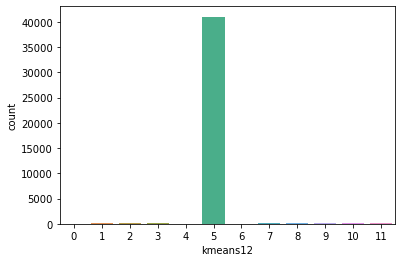

In [110]:
axis = seaborn.countplot(x= 'kmeans12', data=df_kmeans)
axis.set_xticklabels(axis.get_xticklabels(), rotation=0)

In [124]:
from collections import Counter

In [131]:
def get_most_common_words(df, df_column, num_words):
    common_words = []
    for i in range(0,12):
        common = Counter(" ".join(df.loc[df_column == i]['tokenized_words']).split()).most_common(num_words)
        for j in common:
            dict_ = {}
            dict_['cluster'] = i
            dict_['word'] = j[0]
            common_words.append(dict_)
            
    return common_words

In [134]:
df_kmeans["tokenized_words"] = df["tokenized_words"].to_string()
print(get_most_common_words(df_kmeans, df_kmeans["kmeans12"], 25))

[{'cluster': 0, 'word': '[By,'}, {'cluster': 0, 'word': '(,'}, {'cluster': 0, 'word': '),'}, {'cluster': 0, 'word': 'the,'}, {'cluster': 0, 'word': '»,'}, {'cluster': 0, 'word': "'s,"}, {'cluster': 0, 'word': ',,'}, {'cluster': 0, 'word': 'The,'}, {'cluster': 0, 'word': 'of,'}, {'cluster': 0, 'word': 'Min,'}, {'cluster': 0, 'word': 'Read,'}, {'cluster': 0, 'word': 'Reuters,'}, {'cluster': 0, 'word': '-,'}, {'cluster': 0, 'word': '...'}, {'cluster': 0, 'word': 'Barbara,'}, {'cluster': 0, 'word': 'Starr,'}, {'cluster': 0, 'word': '[Neighbors,'}, {'cluster': 0, 'word': 'Forums,'}, {'cluster': 0, 'word': 'Den...'}, {'cluster': 0, 'word': 'we,'}, {'cluster': 0, 'word': '[3,'}, {'cluster': 0, 'word': 'YORK,'}, {'cluster': 0, 'word': 'credit,'}, {'cluster': 0, 'word': ':,'}, {'cluster': 0, 'word': 'and,'}, {'cluster': 1, 'word': '[By,'}, {'cluster': 1, 'word': '(,'}, {'cluster': 1, 'word': '),'}, {'cluster': 1, 'word': 'the,'}, {'cluster': 1, 'word': '»,'}, {'cluster': 1, 'word': "'s,"}, {'cl